
1. You are provided the titanic dataset. Load the dataset and perform splitting into training and test sets with 70:30 ratio randomly using test train split.
2. Use the Logistic regression created from scratch (from the prev question) in this question as well.
3. Data cleaning plays a major role in this question. Report all the methods used by you in the ipynb.

--> 

i. Check for missing values

ii. Drop Columns & Handle missing values

iii. Create dummies for categorical features

you are free to perform other data cleaning to improve your results.



4. Report accuracy score, Confusion matrix, heat map, classifiaction report and any other metrics you feel useful.

dataset link : 
https://iiitaphyd-my.sharepoint.com/:f:/g/personal/apurva_jadhav_students_iiit_ac_in/Eictt5_qmoxNqezgQQiMWeIBph4sxlfA6jWAJNPnV2SF9Q?e=mQmYN0 

(titanic.csv)


In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Finding Missing/Nan values :

Number of missing/Nan values for each feature:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Heatmap showing missing values:



<AxesSubplot:>

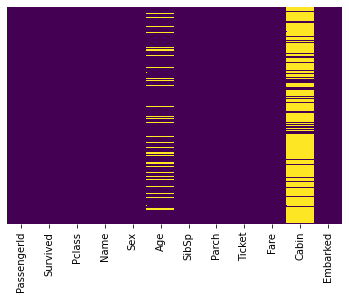

In [3]:
print('Number of missing/Nan values for each feature:\n')
print(df.isnull().sum())
print('\nHeatmap showing missing values:\n')
sns.heatmap(df.isnull(),yticklabels=False,cmap = 'viridis',cbar = False)

### Data Cleaning:
1. For Age column, replace missing values with average age.
2. For Cabin column, replace Nan values with 0 and others with 1.
3. Convert categorical data in Sex and Embarked column to numerical data.

#### 1. Replace missing values in 'Age' column.

In [4]:
avg_age = df['Age'].mean(axis = 0, skipna = True).astype(int)

<AxesSubplot:>

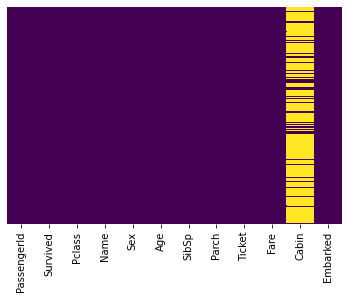

In [5]:
df['Age']=df['Age'].fillna(avg_age)
sns.heatmap(df.isnull(),yticklabels=False,cmap = 'viridis',cbar = False)

#### 2. Changing values in 'Cabin' column.

In [6]:
def func(x):
    if pd.isnull(x):
        return 0 
    else:
        return 1

df['Cabin'] = list(map(func,df['Cabin']))

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [8]:
df.drop(['Name','Ticket'],axis=1,inplace=True)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,0,S
1,2,1,1,female,38.0,1,0,71.2833,1,C
2,3,1,3,female,26.0,0,0,7.9250,0,S
3,4,1,1,female,35.0,1,0,53.1000,1,S
4,5,0,3,male,35.0,0,0,8.0500,0,S


<AxesSubplot:>

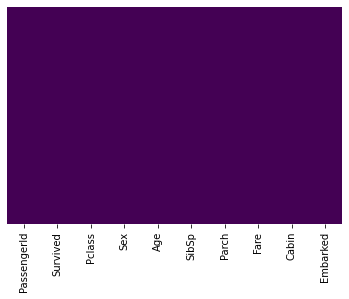

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cmap = 'viridis',cbar = False)

#### 3. Converting categorical data to numerical data.

In [11]:
dummy = pd.get_dummies(df['Sex'])
dummy2 = pd.get_dummies(df['Embarked'])

In [12]:
df.drop(['Sex','Embarked'],axis=1,inplace=True)
df= pd.concat([df,dummy,dummy2],axis =1)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,0,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,1,0,0,1


In [13]:
# print(df['Survived'])
y = np.bitwise_xor(1,df['Survived'])
df.insert(2,'Not_Survived',y)

In [14]:
df.head()

,PassengerId,Survived,Not_Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,female,male,C,Q,S
0,1,0,1,3,22.0,1,0,7.2500,0,0,1,0,0,1
1,2,1,0,1,38.0,1,0,71.2833,1,1,0,1,0,0
2,3,1,0,3,26.0,0,0,7.9250,0,1,0,0,0,1
3,4,1,0,1,35.0,1,0,53.1000,1,1,0,0,0,1
4,5,0,1,3,35.0,0,0,8.0500,0,0,1,0,0,1


### Test-Train Split

In [16]:
X_data=df[['Pclass','female','male','Age','SibSp','Parch','Cabin']]
Y_data=df[['Survived','Not_Survived']]
X_train, X_test, y_train, y_test = train_test_split(X_data,Y_data, test_size=0.30, random_state=42)

In [17]:
x_train=np.array(X_train,dtype = 'float')
x_test= np.array(X_test,dtype= 'float')
y_train = np.array(y_train,dtype = 'float')
y_test=np.array(y_test,dtype='float')

### Logistic Regression

In [18]:
def init_w_b(cols):
    w = np.full((cols,),0.05)
    b = 0.0
    return w,b

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def gradient_descent(x_train,y_train,l_rate,num_itr):
    r,c = x_train.shape
    rows,classes = y_train.shape
    weights = []
    for j in range(classes):
        w, b = init_w_b(c)
    
        for i in range(num_itr):

            z= np.dot(x_train,w)+b
            y_pred = sigmoid(z)
    
            
            loss = -y_train[:,j]*np.log(y_pred)-(1-y_train[:,j])*np.log(1-y_pred)
            cost = (np.sum(loss))/c

            error = (y_pred-y_train[:,j])
    
            dw = np.dot(x_train.T,error)/r
            db = np.sum(y_pred-y_train[:,j])/r

            w = w - (l_rate*dw)
            b = b - (l_rate*db)
        

        
        weights.append([w,b])
    weights = np.array(weights,dtype = 'object')
    return weights


def predict(x_test,weights):

    classes,_ = weights.shape
    Y_prediction=[]
    for i in range(classes):
        w = weights[i][0]
        b = weights[i][1]

        z= sigmoid(np.dot(x_test,w.T)+b)
        Y_prediction.append(z)
    
    Y_prediction=np.array(Y_prediction)

    pred = np.zeros_like(Y_prediction.T)
    x=[]
    for i in range(len(Y_prediction.T)):
        x.append(i)
    y=np.argmax(Y_prediction.T,axis =1)
    pred[x,y]=1

    return pred

In [19]:
weights = gradient_descent(x_train,y_train,0.01,10000)
pred = predict(x_test,weights)

### Evaluation Metrics

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
yts = np.argmax(y_test,axis=1)
y = np.argmax(y_train,axis=1)
print('Accuracy Score:\n',accuracy_score(y_test,pred))
y_pred = np.argmax(pred,axis =1)
print('\nConfusion Matrix:\n',confusion_matrix(yts,y_pred))
print('\nClassification Report:\n',classification_report(yts,y_pred))

Accuracy Score:
 0.8246268656716418

Confusion Matrix:
 [[ 84  27]
 [ 20 137]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.76      0.78       111
           1       0.84      0.87      0.85       157

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.82       268
weighted avg       0.82      0.82      0.82       268



### Scikit learn Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
o = LogisticRegression(multi_class = 'ovr',solver ='liblinear',max_iter = 10000)
ob = o.fit(x_train,y)
log_pred = ob.predict(x_test)
print('Accuracy Score:\n',accuracy_score(yts,log_pred))
print('\nConfusion Matrix:\n',confusion_matrix(yts,log_pred))
print('\nClassification Report:\n',classification_report(yts,log_pred))

Accuracy Score:
 0.8283582089552238

Confusion Matrix:
 [[ 84  27]
 [ 19 138]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.76      0.79       111
           1       0.84      0.88      0.86       157

    accuracy                           0.83       268
   macro avg       0.83      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268

